# **Welcome!**  
> This notebook is a hands-on tour of **NumPy** —> created for the purpose of AI bootcamp by ICES.  
>
> **What you’ll get:** a short explanation, a compact demo, and a small challenge per topic so you can practice instantly.  
> **How to use:** run the code cell below, read the notes, then try the challenge. Have fun! 


In [1]:
import numpy as np
import random
import math

## Introduction to NumPy
> **Why NumPy?**
<img src="numpy.jpg" alt="array" width="200"/>

> NumPy gives you fast array operations, efficient memory use, and vectorized math that outperforms Python lists for numerical work.  
>
> **Learning goals:** understand the benefits of NumPy, import it (`import numpy as np`), and see a micro-benchmark comparing lists vs arrays.  
> **Tip:** Use `import numpy as np` consistently for readability.  
> *Challenge:* Run the demo and note the time difference —> you’ll be surprised.

In [2]:
#Why numpy -> Speed comparision of operation on python list and numpy array
import time

# create large list and array
N = 10000000
py_list = list(range(N))
np_arr = np.arange(N)

# sum using Python loop (slow)
t0 = time.time()
s = 0
for x in py_list:
    s += x
t_loop = time.time() - t0

print("loop time:", round(t_loop,4))
# Outputs: numpy is much faster

loop time: 0.7096


In [3]:
# sum using NumPy (fast, vectorized)
t0 = time.time()
s2 = np_arr.sum()
t_numpy = time.time() - t0

print("numpy time:", round(t_numpy,4))

numpy time: 0.0063


## Creating Arrays
> **What this cell shows:** the main array constructors (`array`, `zeros`, `ones`, `full`, `arange`, `linspace`, and `np.random`).  
>
> **Learning goals:** create deterministically-shaped arrays and randomized data for experiments.  
> **Tip:** Use `np.random.seed()` to make experiments reproducible.  
> *Challenge:* Create a 4×4 magic-like matrix with `np.arange` and `reshape`.

<img src="array.png" alt="array" width="500"/>

In [4]:
#Creating array in numpy
arr = [1,5,0.8,0.6,0.3]
np_arr = np.array(arr)

In [5]:
np_arr

array([1. , 5. , 0.8, 0.6, 0.3])

In [6]:
#Generating zeros
np.zeros((5,2)) 

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [7]:
#Generating ones
np.ones((2,3)) # (2,1,5)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [8]:
#Generating nd array with same value
np.full((5,2,3), fill_value=6,dtype=np.float32)

array([[[6., 6., 6.],
        [6., 6., 6.]],

       [[6., 6., 6.],
        [6., 6., 6.]],

       [[6., 6., 6.],
        [6., 6., 6.]],

       [[6., 6., 6.],
        [6., 6., 6.]],

       [[6., 6., 6.],
        [6., 6., 6.]]], dtype=float32)

In [9]:
#Identity matrix -> square matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
#Using arange
np.arange(5,15) , np.arange(5,10,2)

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([5, 7, 9]))

In [56]:
#Using linspace and logspace
np.linspace(5,10, num=10) , np.logspace(0, 3, num=4, base=10)

(array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
         7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ]),
 array([   1.,   10.,  100., 1000.]))

## Randomness & Reproducibility
> **Essentials:** random integers, uniform & normal draws, `choice`, `shuffle`, and `permutation`.  
>
> **Learning goals:** create pseudo-random datasets and reproduce runs with `np.random.seed()`.  
> **Tip:** `np.random.permutation` returns a new array; `np.random.shuffle` mutates in place.  
> *Challenge:* Shuffle indices and split data into an 80/20 train/test split using a permutation.

In [60]:
#Using random module and similiar to np.random.random: gives output values in the range [0, 1)
np.random.rand(2,3)

array([[0.29348817, 0.01407982, 0.1988424 ],
       [0.71134195, 0.79017554, 0.60595997]])

In [77]:
np.random.randn(2,3) #gives output values of the standard normal distribution with mean = 0 and std = 1

array([[ 0.74124064, -1.71052958,  0.11897849],
       [ 1.00048561,  0.15242086, -0.60139725]])

In [78]:
np.random.standard_normal((2,4)) # same as np.random.randn

array([[-0.84661436,  0.81615272,  0.47170729, -0.2854893 ],
       [ 1.06529247,  0.85399779,  1.78859386,  0.56689407]])

In [15]:
#Random Module:
np.random.seed(42)           # reproducibility

# distributions
r_int = np.random.randint(0, 10, size=5)
r_uni = np.random.random(5)  # uniform [0,1)
r_norm = np.random.randn(5)  # standard normal

# shuffle
arr = np.arange(10)
np.random.shuffle(arr)        # in-place
perm = np.random.permutation(10)  # new shuffled array

print(r_int, r_uni, r_norm)
print("shuffle:", arr)
print("permutation:", perm)

[6 3 7 4 6] [0.44583275 0.09997492 0.45924889 0.33370861 0.14286682] [-0.4826188   0.16416482  0.23309524  0.11799461  1.46237812]
shuffle: [9 5 6 4 3 1 7 2 0 8]
permutation: [1 8 7 5 4 9 0 3 6 2]


## Array Attributes (shape, dtype, size)
> **Why it matters:** before manipulating data you must *know* its shape, type, and memory footprint.  
>
> **Learning goals:** inspect `.shape`, `.ndim`, `.dtype`, `.size`, `.itemsize`, `.nbytes`.  
> **Tip:** `.nbytes` helps when debugging memory issues on large datasets.  
> *Challenge:* Create an array of `float64` and convert it to `float32` —> observe the `nbytes` change.


In [16]:
#Array attributes:
arr = np.array([.2,.3,6.2,5,95,3.9])

In [17]:
#Atrributes:
# 1) dtypes:
arr.dtype

dtype('float64')

In [18]:
arr2 = np.array([.2,.3,6.2,5,95,3.9],dtype=np.int32)

In [19]:
arr2

array([ 0,  0,  6,  5, 95,  3], dtype=int32)

In [20]:
print(arr2.astype(np.int16))

[ 0  0  6  5 95  3]


In [21]:
strarr = np.array(["numpy","session"],dtype="U7")

In [22]:
strarr

array(['numpy', 'session'], dtype='<U7')

In [23]:
arr = np.arange(1,6, dtype=np.float32)

In [24]:
arr

array([1., 2., 3., 4., 5.], dtype=float32)

In [82]:
# 2) shape, size:
arr = np.random.rand(2,5) #np.float64
arr = arr.astype(dtype = np.float32)
arr, arr.dtype, f'item size: {arr.itemsize} bytes'

(array([[0.76855403, 0.04360377, 0.9945505 , 0.4699445 , 0.27956033],
        [0.883494  , 0.74771875, 0.95307183, 0.33075032, 0.55276495]],
       dtype=float32),
 dtype('float32'),
 'item size: 4 bytes')

In [26]:
arr.size # returns total number of elements

10

In [27]:
arr.shape #returns the shape of the numpy array

(2, 5)

In [28]:
# 3) Dimension
arr.ndim # returns the number of dimensions

2

In [29]:
# 4) Memory occupied by the array
arr.itemsize , arr.nbytes

(4, 40)

In [30]:
# (2,3,4) -> (6,4)

In [31]:
#Reshaping array:
arr = np.arange(16)

In [32]:
arr.shape # -> 1d array

(16,)

In [33]:
arr3 = np.random.rand(5,1)
arr3.shape

(5, 1)

In [34]:
arr.reshape(2,8) # -> 2d array

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [35]:
arr.reshape(4,2,2) # -> 3d array

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15]]])

In [36]:
np.random.rand(1,5)

array([[0.42515587, 0.20794166, 0.56770033, 0.03131329, 0.84228477]])

## Indexing & Slicing
> **Focus:** access values precisely —> by index, by slice, with negative indices, and with boolean/fancy indexing.  
>
> **Learning goals:** master common indexing patterns and extraction techniques.  
> **Tip:** Slices return *views* not copies —> be mindful when mutating slices.  
> *Challenge:* Extract all values greater than 50 from a 1D array using boolean indexing.


In [37]:
#Indexing, Slicing:
import numpy as np
a = np.arange(10) 
print(a)
print(a[2])              
print(a[-1])             
print(a[2:8:2])   

a2 = a.reshape(2,5)
print(a2)
print(a2[:1, 1:3])

[0 1 2 3 4 5 6 7 8 9]
2
9
[2 4 6]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[1 2]]


In [38]:
M = np.arange(12).reshape(3,4)
print("M:\n", M)
print("row 1:", M[1])
print("element (2,3):", M[2,3])

M:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
row 1: [4 5 6 7]
element (2,3): 11


In [39]:
# fancy indexing
idx = [0,2]
print("rows 0 and 2:\n", M[idx])

# boolean indexing: select even numbers
a = np.arange(10)
print(a)
bool_arr = (a % 2 == 0)
print(bool_arr)
print("even numbers:", a[bool_arr])

rows 0 and 2:
 [[ 0  1  2  3]
 [ 8  9 10 11]]
[0 1 2 3 4 5 6 7 8 9]
[ True False  True False  True False  True False  True False]
even numbers: [0 2 4 6 8]


## Array Operations & Broadcasting
> **Idea:** do element-wise math quickly with NumPy’s universal functions and broadcasting rules.  
>
> **Learning goals:** perform arithmetic, apply `np.sqrt`, `np.exp`, and add vectors to matrices using broadcasting.  
> **Tip:** When shapes differ, ask “can this broadcast?” —> align trailing dimensions.  
> *Challenge:* Add a 1×3 array to every row of a 5×3 matrix and verify the result shape.

In [40]:
#Simple array operations:
import numpy as np
A = np.array([1,2,3])
B = np.array([10,20,30])

# Element wise operations --> shape constant

print("add:", A + B)
print("mul:", A * 2)
print("sqrt:", np.sqrt(A))
print("exp:", np.exp(A))

add: [11 22 33]
mul: [2 4 6]
sqrt: [1.         1.41421356 1.73205081]
exp: [ 2.71828183  7.3890561  20.08553692]


## Mathematical & Statistical Functions
> **What you’ll do:** compute sums, means, variances, mins/maxs and use `axis` to aggregate rows/columns.  
>
> **Learning goals:** use `np.sum`, `np.mean`, `np.std`, `np.argmax` with `axis` correctly.  
> **Tip:** `axis=0` collapses rows (operate column-wise); `axis=1` collapses columns (operate row-wise).  
> *Challenge:* Compute column-wise mean and subtract it from the matrix (centering).

In [41]:
#Mathematical and Statistical Operations:
M = np.arange(1,13).reshape(3,4)  # 3x4
print("M:\n", M)
print("sum all:", M.sum())
print("sum axis=0 (columns):", M.sum(axis=0))
print("sum axis=1 (rows):", M.sum(axis=1))
print("mean:", M.mean(), "std:", M.std())
print("argmax axis=1:", M.argmin(axis=0))

# axis 0: first dimension, axis 1: second dimension and soon

M:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
sum all: 78
sum axis=0 (columns): [15 18 21 24]
sum axis=1 (rows): [10 26 42]
mean: 6.5 std: 3.452052529534663
argmax axis=1: [0 0 0 0]


## Brocasting intution 
<img src="broadcasting.png" alt="broadcasting" width="500"/> <img src="broad.png" alt="broad" width="400" />

In [42]:
# Broadcasting:
"""
Broadcasting Rules

Compare shapes from right to left.

Two dimensions are compatible if:

They are equal, OR

One of them is 1.

If incompatible, NumPy throws an error.
"""

import numpy as np

a = np.array([1, 2, 3]) 
b = 5  # scalar

result = a + b
print(result)  # [6 7 8]


[6 7 8]


In [ ]:
a = np.array([[1], [2], [3]])
print(np.shape(a))
# shape (3,1)
b = np.array([10, 20, 30])
print(np.shape(b))
# shape (3,): treated as (1,3) dimension

result = a + b
print(result)

(3, 1)
(3,)
[[11 21 31]
 [12 22 32]
 [13 23 33]]


In [44]:
a = np.array([[1, 2, 3]])      # shape (1,3)
b = np.array([[4], [5], [6]])  # shape (3,1)

result = a + b
print(result)

[[5 6 7]
 [6 7 8]
 [7 8 9]]


In [45]:
a = np.array([1, 2, 3])
print(np.shape(a))

# shape (3,)
b = np.array([4, 5])     # shape (2,)

# This will throw an error -> violation of broadcasting rules
# print(a + b) 

(3,)


In [46]:
#Normalization
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10,11,12]])

mean = X.mean(axis=0)   # shape (3,)
std = X.std(axis=0)     # shape (3,)

X_norm = (X - mean) / std

(4,3) 
( 4, 3,)

print(X_norm)

[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [95]:
#Normalization
# logits (raw scores from a model, for example)
x = np.array([[2.0, 1.0, 0.1],
              [3.2,6.5,4.9]])  

# exponentiate
exp_x = np.exp(x)

# normalize (sum of probabilities = 1)
print(np.sum(exp_x,axis = 1, keepdims=True))
print(np.sum(exp_x,axis = 1, keepdims=True).shape)
print()
print(np.sum(exp_x,axis=1,keepdims=False))
x = np.sum(exp_x,axis=1,keepdims=False).shape
print(x)
softmax = exp_x / np.sum(exp_x, axis=1, keepdims=True) # Why keepdims is important here (2,)

print("Probabilities:\n", softmax)
print("Sum:\n", np.sum(softmax, axis=1, keepdims = True))  # always 1

[[ 11.21250885]
 [823.96394293]]
(2, 1)

[ 11.21250885 823.96394293]
(2,)
Probabilities:
 [[0.65900114 0.24243297 0.09856589]
 [0.02977379 0.80724604 0.16298017]]
Sum:
 [[1.]
 [1.]]


## Reshaping, Flattening & Transpose
> **Why reshape:** adapt your data’s geometry for ML models, plotting, or broadcasting.  
>
> **Learning goals:** use `.reshape()`, `.ravel()`, `.flatten()`, `.T`, and `np.newaxis`.  
> **Tip:** `.ravel()` is a view when possible; `.flatten()` always makes a copy.  
> *Challenge:* Turn a flat 36-length array into shape `(3, 3, 4)` and back.

In [ ]:
a = np.arange(6)                  # [0..5]
b = a.reshape((2,3))              # view (if possible)
print("b:\n", b)
print("b.ravel():", b.ravel())    # flattened view
print("b.flatten():", b.flatten())# flattened copy



# add new dimension to a numpy array using np.newaxis
x = np.arange(3)          # shape (3,)
x_col = x[:, np.newaxis]  # shape (3,1), take all rows and add a new column dimension 
print("x_col shape:", x_col.shape)

# transpose
M = np.arange(6).reshape(2,3)
print("Transposed M.T:\n", M.T)
print("M.T shape:", M.T.shape)

b:
 [[0 1 2]
 [3 4 5]]
b.ravel(): [0 1 2 3 4 5]
b.flatten(): [0 1 2 3 4 5]
x_col shape: (3, 1)
Transposed M.T:
 [[0 3]
 [1 4]
 [2 5]]
M.T shape: (3, 2)


## Views vs Copies (Memory semantics)
> **Why this matters:** shared memory causes subtle bugs —> know when you’re mutating shared data.  
>
> **Learning goals:** learn `.view()` vs `.copy()`, and how assignment affects memory.  
> **Tip:** When in doubt, use `.copy()` before mutating if you want safety.  
> *Challenge:* Make a view of a slice, modify it, and observe the original array change.

In [98]:
#Differences between view and copy
a = np.arange(6)
print(a)
v = a.view()      # shallow view (shares memory)
c = a.copy()      # deep copy (independent)

v[0] = 999
print("original after changing view:", a[0])  # changed because view shares memory

c[1] = -1
print("original after changing copy:", a[1])  # unchanged

[0 1 2 3 4 5]
original after changing view: 999
original after changing copy: 1


## Stacking & Splitting Arrays
> **Use case:** combine features or split datasets for train/test workflows.  
>
> **Learning goals:** `hstack`, `vstack`, `concatenate`, `split`, `hsplit`, `vsplit`.  
> **Tip:** Pay attention to the `axis` argument —> it’s a frequent source of bugs.  
> *Challenge:* Horizontally stack two `3×2` matrices into a `3×4` matrix.

In [103]:
#stacking and Splitting 
a = np.array([1,2,3])
b = np.array([4,5,6])
h = np.hstack((a,b))
v = np.vstack((a,b))
print("hstack:", h)
print("vstack:\n", v)

# concatenating along axis for 2D arrays
A = np.ones((2,2))
B = np.zeros((2,2))
print("")
print("concat axis=0:\n", np.concatenate([A,B], axis=0))
print("")

# splitting
arr = np.arange(10)
left, right = np.split(arr, [6]) 
# a = arr[2:5]
# b = arr[5:]
# first 6 in left, rest in right
print("left:", left, "right:", right)

hstack: [1 2 3 4 5 6]
vstack:
 [[1 2 3]
 [4 5 6]]

concat axis=0:
 [[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]]

left: [0 1 2 3 4 5] right: [6 7 8 9]


## Linear Algebra with NumPy
> **Key ops:** matrix multiply (`@`, `np.dot`), inverse, determinant, eigen decomposition, and solving linear systems.  
>
> **Learning goals:** use `np.linalg.solve`, `np.linalg.inv`, `np.linalg.det`, `np.linalg.eig`, and `np.linalg.norm`.  
> **Tip:** Prefer `np.linalg.solve(A, b)` over `np.linalg.inv(A) @ b` —> better numerical stability and speed.  
> *Challenge:* Solve a small `3×3` linear system and confirm `A @ x ≈ b`.

In [51]:
#Simple Linear Algebra
A = np.array([[3,1],[1,2]], dtype=float)
b = np.array([9,8], dtype=float)

# matrix multiply
x = np.linalg.solve(A, b)   # solves Ax = b  A @ b a.multiply(b)
print("solution x:", x)

# inverse & determinant
invA = np.linalg.inv(A)
detA = np.linalg.det(A)
print("invA:\n", invA)
print("det(A):", detA)

# eigen decomposition
vals, vecs = np.linalg.eig(A)
print("eigenvalues:", vals)

solution x: [2. 3.]
invA:
 [[ 0.4 -0.2]
 [-0.2  0.6]]
det(A): 5.000000000000001
eigenvalues: [3.61803399 1.38196601]


### Masked Arrays & Conditional Ops
> **Goal:** handle missing or invalid data elegantly and perform conditional transformations.  
>
> **Learning goals:** use `np.where`, `np.any`, `np.all`, and `numpy.ma` masked arrays.  
> **Tip:** `np.where` is excellent for conditional replacement without loops.  
> *Challenge:* Replace negative values with the column mean using `np.where`.

In [52]:
#Masked array concept
a = np.array([-2, -1, 0, 1, 2])

# replace negatives with 0
b = np.where(a < 0, 0, a)
print("replace negatives:", b)

# boolean checks
print("any negative?", np.any(a < 0))
print("all non-negative?", np.all(a >= 0))

# masked array (NumPy masked)
import numpy.ma as ma
masked = ma.masked_where(a < 0, a)   # mask negatives
print("masked:", masked)

replace negatives: [0 0 0 1 2]
any negative? True
all non-negative? False
masked: [-- -- 0 1 2]


### Images as Arrays
> **Why:** images are arrays — you can manipulate pixels with NumPy for filters, transforms, and augmentation.  
>
> **Learning goals:** read/manipulate an image array, invert colors, and display with `matplotlib`.   
> *Challenge:* Convert an RGB image to grayscale using a weighted sum of the channels.

(400, 600, 4)


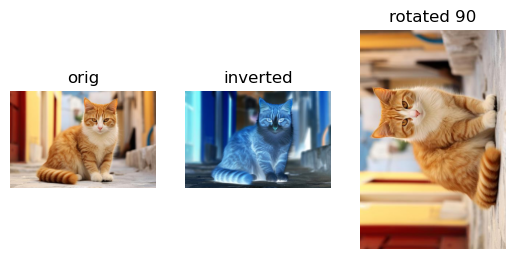

In [105]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# create a small RGB image (100x100) with gradient
img = mpimg.imread('cat.png')
height = img.shape[0]
width = img.shape[1]

# invert colors using NumPy
print(img.shape)
img_inv = 1-img[:,:,:3]  # ignore alpha channel if present
img_rot = np.rot90(img)

# show (in a notebook)
plt.subplot(1,3,1); plt.title("orig"); plt.imshow(img); plt.axis('off')
plt.subplot(1,3,2); plt.title("inverted"); plt.imshow(img_inv); plt.axis('off')
plt.subplot(1,3,3); plt.title("rotated 90"); plt.imshow(img_rot); plt.axis('off')
plt.show()

[[[0.6666667  0.2784314  0.1882353  1.        ]
  [0.6627451  0.27450982 0.18431373 1.        ]
  [0.654902   0.26666668 0.1764706  1.        ]
  ...
  [0.42745098 0.30588236 0.19607843 1.        ]
  [0.44705883 0.30588236 0.20392157 1.        ]
  [0.4509804  0.3137255  0.20392157 1.        ]]

 [[0.6666667  0.2784314  0.1882353  1.        ]
  [0.6627451  0.27450982 0.18431373 1.        ]
  [0.654902   0.26666668 0.1764706  1.        ]
  ...
  [0.42745098 0.30588236 0.19607843 1.        ]
  [0.44705883 0.30588236 0.20392157 1.        ]
  [0.4509804  0.3137255  0.20392157 1.        ]]

 [[0.6627451  0.27450982 0.18431373 1.        ]
  [0.65882355 0.27058825 0.18039216 1.        ]
  [0.654902   0.26666668 0.1764706  1.        ]
  ...
  [0.42745098 0.30588236 0.19607843 1.        ]
  [0.44705883 0.30588236 0.20392157 1.        ]
  [0.4509804  0.3137255  0.20392157 1.        ]]

 ...

 [[0.7647059  0.69411767 0.6156863  1.        ]
  [0.7529412  0.68235296 0.6039216  1.        ]
  [0.74901

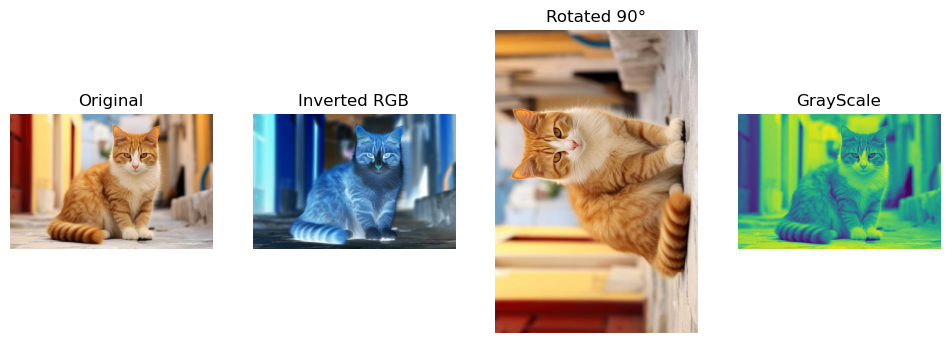

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('cat.png')  # shape (H, W, 4)
print(img)

# invert only RGB channels
img_inv = img.copy()
img_inv[..., :3] = 1 - img_inv[..., :3]  # invert R, G, B
# alpha channel stays the same
# img_inv[..., 3] = img[..., 3]  # optional, already unchanged

# rotate 90° for fun
img_rot = np.rot90(img)
# gray scale representation

gray = np.mean(img[..., :3], axis=2)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,4,2)
plt.title("Inverted RGB")
plt.imshow(img_inv)
plt.axis('off')

plt.subplot(1,4,3)
plt.title("Rotated 90°")
plt.imshow(img_rot)
plt.axis('off')

plt.subplot(1,4,4)
plt.title("GrayScale")
plt.imshow(gray)
plt.axis('off')

plt.show()


#### Exercise: Load and save numpy array from memory to disk.
#### Exercise: Implement an image filter using numpy array manipulation
#### Exercise: Implement 2d rotation of image using numpy
#### Exercise: Review the important concepts and do some challenges in each section

In [55]:
## Try yourself